# Importing Libraries

In [1]:
import bs4 as bs
from bs4 import BeautifulSoup
import urllib
import re
import nltk
import string
from nltk.corpus import stopwords
import string

# Data Extraction

In [2]:
url = urllib.request.urlopen('https://en.wikipedia.org/wiki/ChatGPT').read() 

In [3]:
soup = BeautifulSoup(url, 'lxml')

In [4]:
data= " "
for i in soup.find_all('p'):
    data+=i.text

In [5]:
print(data)

 
				Pages for logged out editors learn more

ChatGPT (Generative Pre-trained Transformer)[1] is a chatbot launched by OpenAI in November 2022. It is built on top of OpenAI's GPT-3 family of large language models, and is fine-tuned (an approach to transfer learning[2]) with both supervised and reinforcement learning techniques.
ChatGPT was launched as a prototype on November 30, 2022, and quickly garnered attention for its detailed responses and articulate answers across many domains of knowledge. Its uneven factual accuracy was identified as a significant drawback.[3]
Following the release of ChatGPT, OpenAI was valued at $29 billion.[4]
ChatGPT was fine-tuned on top of GPT-3.5 using supervised learning as well as reinforcement learning.[5] Both approaches used human trainers to improve the model's performance. In the case of supervised learning, the model was provided with conversations in which the trainers played both sides: the user and the AI assistant. In the reinforcement step

# Sentiment Analysis

### Tokenization

In [6]:
#Sentence Tokenization

sen=nltk.sent_tokenize(data) #Sentence Tokenization
print(sen)

[' \n\t\t\t\tPages for logged out editors learn more\n\nChatGPT (Generative Pre-trained Transformer)[1] is a chatbot launched by OpenAI in November 2022.', "It is built on top of OpenAI's GPT-3 family of large language models, and is fine-tuned (an approach to transfer learning[2]) with both supervised and reinforcement learning techniques.", 'ChatGPT was launched as a prototype on November 30, 2022, and quickly garnered attention for its detailed responses and articulate answers across many domains of knowledge.', 'Its uneven factual accuracy was identified as a significant drawback.', '[3]\nFollowing the release of ChatGPT, OpenAI was valued at $29 billion.', '[4]\nChatGPT was fine-tuned on top of GPT-3.5 using supervised learning as well as reinforcement learning.', "[5] Both approaches used human trainers to improve the model's performance.", 'In the case of supervised learning, the model was provided with conversations in which the trainers played both sides: the user and the AI a

In [7]:
#Data Cleaning and Word Tokenization

dt = re.sub('[%s]' % re.escape(string.punctuation), '', data) #string formatting expression to remove punctuations
dt = re.sub('https?://\S+|www\.\S+', '', dt) #To remove hyderlinks
dt = re.sub(r'\[[0-9]*\]',' ',dt) #Remove numbers in squared brackets [11],[] but not [1a],[56y]
dt = re.sub(r'\d+',' ', dt) #Remove digits
dt = re.sub(r'\s+',' ',dt) #Remove blanks

words = nltk.word_tokenize(dt) #Word Tokenization
print(words)

['Pages', 'for', 'logged', 'out', 'editors', 'learn', 'more', 'ChatGPT', 'Generative', 'Pretrained', 'Transformer', 'is', 'a', 'chatbot', 'launched', 'by', 'OpenAI', 'in', 'November', 'It', 'is', 'built', 'on', 'top', 'of', 'OpenAIs', 'GPT', 'family', 'of', 'large', 'language', 'models', 'and', 'is', 'finetuned', 'an', 'approach', 'to', 'transfer', 'learning', 'with', 'both', 'supervised', 'and', 'reinforcement', 'learning', 'techniques', 'ChatGPT', 'was', 'launched', 'as', 'a', 'prototype', 'on', 'November', 'and', 'quickly', 'garnered', 'attention', 'for', 'its', 'detailed', 'responses', 'and', 'articulate', 'answers', 'across', 'many', 'domains', 'of', 'knowledge', 'Its', 'uneven', 'factual', 'accuracy', 'was', 'identified', 'as', 'a', 'significant', 'drawback', 'Following', 'the', 'release', 'of', 'ChatGPT', 'OpenAI', 'was', 'valued', 'at', 'billion', 'ChatGPT', 'was', 'finetuned', 'on', 'top', 'of', 'GPT', 'using', 'supervised', 'learning', 'as', 'well', 'as', 'reinforcement', 'le

In [8]:
#Listing out Complex words.
#Complex words are words in the text that contain more than two syllables.

from PyDictionary import PyDictionary
import re
import textstat
dictionary=PyDictionary()
cwords=[]
for i in words:
    syllables = textstat.syllable_count(i)
    if syllables > 2:
        cwords.append(i)

print(cwords)

['editors', 'ChatGPT', 'Generative', 'November', 'family', 'supervised', 'reinforcement', 'ChatGPT', 'prototype', 'November', 'attention', 'responses', 'articulate', 'factual', 'accuracy', 'identified', 'significant', 'Following', 'ChatGPT', 'ChatGPT', 'supervised', 'reinforcement', 'approaches', 'performance', 'supervised', 'provided', 'conversations', 'assistant', 'reinforcement', 'responses', 'created', 'previous', 'conversation', 'several', 'iterations', 'Proximal', 'Policy', 'Optimization', 'Proximal', 'Policy', 'Optimization', 'algorithms', 'costeffective', 'benefit', 'policy', 'optimization', 'algorithms', 'computationally', 'expensive', 'operations', 'performance', 'collaboration', 'Microsoft', 'supercomputing', 'infrastructure', 'addition', 'continues', 'ChatGPT', 'ChatGPT', 'responses', 'ChatGPT', 'upvoting', 'downvoting', 'additional', 'conversationalist', 'ChatGPT', 'versatile', 'example', 'ability', 'computer', 'depending', 'average', 'testtaker', 'poetry', 'emulate', 'sim

### Frequeny Distribution


In [9]:
#FreqDist give two values as outcome-unique samples and total samples

from nltk.probability import FreqDist
fdist=FreqDist(words)
print(fdist)

<FreqDist with 963 samples and 2118 outcomes>


In [10]:
#Gives a list of most common words and how many times they are repeated

fdist.most_common()

[('to', 88),
 ('the', 78),
 ('of', 64),
 ('ChatGPT', 57),
 ('and', 50),
 ('a', 46),
 ('that', 37),
 ('in', 35),
 ('is', 26),
 ('The', 22),
 ('on', 21),
 ('was', 20),
 ('as', 20),
 ('with', 17),
 ('In', 16),
 ('for', 14),
 ('OpenAI', 14),
 ('its', 12),
 ('or', 12),
 ('from', 11),
 ('be', 11),
 ('by', 10),
 ('are', 10),
 ('December', 10),
 ('an', 9),
 ('human', 9),
 ('used', 8),
 ('it', 8),
 ('about', 8),
 ('models', 7),
 ('using', 7),
 ('had', 7),
 ('text', 7),
 ('student', 7),
 ('when', 7),
 ('but', 7),
 ('content', 7),
 ('wrote', 7),
 ('GPT', 6),
 ('has', 6),
 ('ChatGPTs', 6),
 ('one', 6),
 ('launched', 5),
 ('learning', 5),
 ('responses', 5),
 ('at', 5),
 ('model', 5),
 ('AI', 5),
 ('were', 5),
 ('they', 5),
 ('answer', 5),
 ('not', 5),
 ('paper', 5),
 ('artificial', 5),
 ('intelligence', 5),
 ('how', 5),
 ('OpenAIs', 4),
 ('large', 4),
 ('language', 4),
 ('answers', 4),
 ('many', 4),
 ('also', 4),
 ('example', 4),
 ('questions', 4),
 ('song', 4),
 ('lyrics', 4),
 ('Columbus', 4),
 (

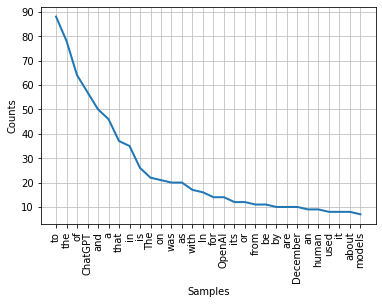

In [11]:
#Frequency Distributuion plot
import matplotlib.pyplot as plt
fdist.plot(30,cumulative=False)
plt.show()

### Removing Stop Words 

In [12]:
with open('StopWords_GenericLong.txt', 'r') as file:
    stop_words = file.read()

In [13]:
stopwords = stop_words.split()
print(stopwords)

['a', "a's", 'able', 'about', 'above', 'according', 'accordingly', 'across', 'actually', 'after', 'afterwards', 'again', 'against', "ain't", 'all', 'allow', 'allows', 'almost', 'alone', 'along', 'already', 'also', 'although', 'always', 'am', 'among', 'amongst', 'an', 'and', 'another', 'any', 'anybody', 'anyhow', 'anyone', 'anything', 'anyway', 'anyways', 'anywhere', 'apart', 'appear', 'appreciate', 'appropriate', 'are', "aren't", 'around', 'as', 'aside', 'ask', 'asking', 'associated', 'at', 'available', 'away', 'awfully', 'b', 'be', 'became', 'because', 'become', 'becomes', 'becoming', 'been', 'before', 'beforehand', 'behind', 'being', 'believe', 'below', 'beside', 'besides', 'best', 'better', 'between', 'beyond', 'both', 'brief', 'but', 'by', 'c', "c'mon", "c's", 'came', 'can', "can't", 'cannot', 'cant', 'cause', 'causes', 'certain', 'certainly', 'changes', 'clearly', 'co', 'com', 'come', 'comes', 'concerning', 'consequently', 'consider', 'considering', 'contain', 'containing', 'conta

In [14]:
#Listing out filtered words
fil_words = [word for word in words if word not in stopwords]
print(fil_words)

['Pages', 'logged', 'editors', 'learn', 'ChatGPT', 'Generative', 'Pretrained', 'Transformer', 'chatbot', 'launched', 'OpenAI', 'November', 'It', 'built', 'top', 'OpenAIs', 'GPT', 'family', 'large', 'language', 'models', 'finetuned', 'approach', 'transfer', 'learning', 'supervised', 'reinforcement', 'learning', 'techniques', 'ChatGPT', 'launched', 'prototype', 'November', 'quickly', 'garnered', 'attention', 'detailed', 'responses', 'articulate', 'answers', 'domains', 'knowledge', 'Its', 'uneven', 'factual', 'accuracy', 'identified', 'significant', 'drawback', 'Following', 'release', 'ChatGPT', 'OpenAI', 'valued', 'billion', 'ChatGPT', 'finetuned', 'top', 'GPT', 'supervised', 'learning', 'reinforcement', 'learning', 'Both', 'approaches', 'human', 'trainers', 'improve', 'models', 'performance', 'In', 'case', 'supervised', 'learning', 'model', 'provided', 'conversations', 'trainers', 'played', 'sides', 'user', 'AI', 'assistant', 'In', 'reinforcement', 'step', 'human', 'trainers', 'ranked',

In [15]:
print(len(words)) #Word count before removing stop words
print(len(fil_words)) #Word count after removing stop words

2118
1213


### Stemming
Stemming is a process in text analysis that involves reducing a word to its base or root form. This is done to reduce the dimensionality of the text data and to group together different forms of the same word. One common example of stemming is the reduction of "running" to "run" and "runner" to "run".

In [16]:
#Stemming
from nltk.stem import PorterStemmer 
ps = PorterStemmer()

stem_words=[]
for w in fil_words:
    stem_words.append(ps.stem(w))

print(stem_words)

['page', 'log', 'editor', 'learn', 'chatgpt', 'gener', 'pretrain', 'transform', 'chatbot', 'launch', 'openai', 'novemb', 'It', 'built', 'top', 'openai', 'gpt', 'famili', 'larg', 'languag', 'model', 'finetun', 'approach', 'transfer', 'learn', 'supervis', 'reinforc', 'learn', 'techniqu', 'chatgpt', 'launch', 'prototyp', 'novemb', 'quickli', 'garner', 'attent', 'detail', 'respons', 'articul', 'answer', 'domain', 'knowledg', 'it', 'uneven', 'factual', 'accuraci', 'identifi', 'signific', 'drawback', 'follow', 'releas', 'chatgpt', 'openai', 'valu', 'billion', 'chatgpt', 'finetun', 'top', 'gpt', 'supervis', 'learn', 'reinforc', 'learn', 'both', 'approach', 'human', 'trainer', 'improv', 'model', 'perform', 'In', 'case', 'supervis', 'learn', 'model', 'provid', 'convers', 'trainer', 'play', 'side', 'user', 'AI', 'assist', 'In', 'reinforc', 'step', 'human', 'trainer', 'rank', 'respons', 'model', 'creat', 'previou', 'convers', 'these', 'rank', 'creat', 'reward', 'model', 'model', 'finetun', 'iter'

### Lemmatization
Lemmatization is a process in natural language processing (NLP) that reduces a word to its base or root form, known as its lemma. Unlike stemming, which uses simple heuristics to chop off the end of a word, lemmatization makes use of the context and part of speech of a word to determine its lemma. 

Lemmatization is a more sophisticated process than stemming, and it's generally considered to be more accurate because it takes into account the context and part of speech of a word. However, it can be computationally expensive, so it may not be the best choice for large text datasets.

The word "better" has "good" as it's lemma.

In [17]:
import nltk
from nltk.stem import WordNetLemmatizer

# Create a new WordNetLemmatizer object
lemmatizer = WordNetLemmatizer()

lem_words=[]
for w in fil_words:
    lem_words.append(ps.stem(w))

print(lem_words)


['page', 'log', 'editor', 'learn', 'chatgpt', 'gener', 'pretrain', 'transform', 'chatbot', 'launch', 'openai', 'novemb', 'It', 'built', 'top', 'openai', 'gpt', 'famili', 'larg', 'languag', 'model', 'finetun', 'approach', 'transfer', 'learn', 'supervis', 'reinforc', 'learn', 'techniqu', 'chatgpt', 'launch', 'prototyp', 'novemb', 'quickli', 'garner', 'attent', 'detail', 'respons', 'articul', 'answer', 'domain', 'knowledg', 'it', 'uneven', 'factual', 'accuraci', 'identifi', 'signific', 'drawback', 'follow', 'releas', 'chatgpt', 'openai', 'valu', 'billion', 'chatgpt', 'finetun', 'top', 'gpt', 'supervis', 'learn', 'reinforc', 'learn', 'both', 'approach', 'human', 'trainer', 'improv', 'model', 'perform', 'In', 'case', 'supervis', 'learn', 'model', 'provid', 'convers', 'trainer', 'play', 'side', 'user', 'AI', 'assist', 'In', 'reinforc', 'step', 'human', 'trainer', 'rank', 'respons', 'model', 'creat', 'previou', 'convers', 'these', 'rank', 'creat', 'reward', 'model', 'model', 'finetun', 'iter'

### POS Tagging
Part-of-speech (POS) tagging is a process in natural language processing (NLP) that assigns a POS tag to each word in a sentence. The POS tag indicates the grammatical function of the word in the sentence, such as a noun, verb, adjective, adverb, and so on.



In [18]:

pos_tags = nltk.pos_tag(fil_words)

print(pos_tags)


[('Pages', 'NNS'), ('logged', 'VBD'), ('editors', 'NNS'), ('learn', 'VBP'), ('ChatGPT', 'NNP'), ('Generative', 'NNP'), ('Pretrained', 'VBD'), ('Transformer', 'NNP'), ('chatbot', 'NN'), ('launched', 'VBD'), ('OpenAI', 'NNP'), ('November', 'NNP'), ('It', 'PRP'), ('built', 'VBD'), ('top', 'JJ'), ('OpenAIs', 'NNP'), ('GPT', 'NNP'), ('family', 'NN'), ('large', 'JJ'), ('language', 'NN'), ('models', 'NNS'), ('finetuned', 'VBN'), ('approach', 'NN'), ('transfer', 'NN'), ('learning', 'VBG'), ('supervised', 'JJ'), ('reinforcement', 'NN'), ('learning', 'VBG'), ('techniques', 'NNS'), ('ChatGPT', 'NNP'), ('launched', 'VBD'), ('prototype', 'JJ'), ('November', 'NNP'), ('quickly', 'RB'), ('garnered', 'VBD'), ('attention', 'NN'), ('detailed', 'JJ'), ('responses', 'NNS'), ('articulate', 'VBP'), ('answers', 'NNS'), ('domains', 'NNS'), ('knowledge', 'VBP'), ('Its', 'PRP$'), ('uneven', 'JJ'), ('factual', 'JJ'), ('accuracy', 'NN'), ('identified', 'VBN'), ('significant', 'JJ'), ('drawback', 'NN'), ('Following

In [19]:
#Pos Tag abbreviations with examples
nltk.help.upenn_tagset('VB')

VB: verb, base form
    ask assemble assess assign assume atone attention avoid bake balkanize
    bank begin behold believe bend benefit bevel beware bless boil bomb
    boost brace break bring broil brush build ...


### Creating a dictionary of Positive and Negative words

In [20]:
with open('positive-words.txt', 'r') as file:
    poswords= file.read()

p=poswords.split()
print(p)

['a+', 'abound', 'abounds', 'abundance', 'abundant', 'accessable', 'accessible', 'acclaim', 'acclaimed', 'acclamation', 'accolade', 'accolades', 'accommodative', 'accomodative', 'accomplish', 'accomplished', 'accomplishment', 'accomplishments', 'accurate', 'accurately', 'achievable', 'achievement', 'achievements', 'achievible', 'acumen', 'adaptable', 'adaptive', 'adequate', 'adjustable', 'admirable', 'admirably', 'admiration', 'admire', 'admirer', 'admiring', 'admiringly', 'adorable', 'adore', 'adored', 'adorer', 'adoring', 'adoringly', 'adroit', 'adroitly', 'adulate', 'adulation', 'adulatory', 'advanced', 'advantage', 'advantageous', 'advantageously', 'advantages', 'adventuresome', 'adventurous', 'advocate', 'advocated', 'advocates', 'affability', 'affable', 'affably', 'affectation', 'affection', 'affectionate', 'affinity', 'affirm', 'affirmation', 'affirmative', 'affluence', 'affluent', 'afford', 'affordable', 'affordably', 'afordable', 'agile', 'agilely', 'agility', 'agreeable', 'ag

In [21]:
with open('negative-words.txt', 'r') as file:
    negwords = file.read()
    
n=negwords.split()
print(n)

['2-faced', '2-faces', 'abnormal', 'abolish', 'abominable', 'abominably', 'abominate', 'abomination', 'abort', 'aborted', 'aborts', 'abrade', 'abrasive', 'abrupt', 'abruptly', 'abscond', 'absence', 'absent-minded', 'absentee', 'absurd', 'absurdity', 'absurdly', 'absurdness', 'abuse', 'abused', 'abuses', 'abusive', 'abysmal', 'abysmally', 'abyss', 'accidental', 'accost', 'accursed', 'accusation', 'accusations', 'accuse', 'accuses', 'accusing', 'accusingly', 'acerbate', 'acerbic', 'acerbically', 'ache', 'ached', 'aches', 'achey', 'aching', 'acrid', 'acridly', 'acridness', 'acrimonious', 'acrimoniously', 'acrimony', 'adamant', 'adamantly', 'addict', 'addicted', 'addicting', 'addicts', 'admonish', 'admonisher', 'admonishingly', 'admonishment', 'admonition', 'adulterate', 'adulterated', 'adulteration', 'adulterier', 'adversarial', 'adversary', 'adverse', 'adversity', 'afflict', 'affliction', 'afflictive', 'affront', 'afraid', 'aggravate', 'aggravating', 'aggravation', 'aggression', 'aggress

# Calculating Variables

In [23]:
#1. POSITIVE SCORE
pscore=0
for i in fil_words:
    if i in p:
        pscore+=1
print('POSITIVE SCORE :',pscore)
print("\n")


#2. NEGATIVE SCORE
nscore=0
for i in fil_words:
    if i in n:
        nscore+=1
print('NEGATIVE SCORE :',nscore,)
print("\n")


#3. POLARITY SCORE
polscore = (pscore-nscore)/ ((pscore + nscore) + 0.000001)
print('POLARITY SCORE :',polscore)
print("\n")


#4. SUBJECTIVITY SCORE
subscore = (pscore + nscore)/ ((len(fil_words)) + 0.000001)
print('SUBJECTIVITY SCORE :',subscore)
print("\n")


#5. AVG SENTENCE LENGTH
def avg_sentence_len(data):
    if(sen[len(sen)-1]==""):
        average_sentence_length = len(words) / len(sen)-1
    else:
        average_sentence_length = len(words) / len(sen)
    return average_sentence_length 
avgsl = avg_sentence_len(data) 
print('AVG SENTENCE LENGTH :',avgsl)
print("\n")


#6. PERCENTAGE OF COMPLEX WORDS
percwords=len(cwords)/len(words)
print('PERCENTAGE OF COMPLEX WORDS :',percwords)
print("\n")


#7. FOG INDEX
fogindex = 0.4 * (avgsl + percwords)
print('FOG INDEX :', fogindex)
print("\n")


#8. AVG NUMBER OF WORDS PER SENTENCE
avgwpers = len(words)/len(sen)
print('AVG NUMBER OF WORDS PER SENTENCE :',avgsl)
print("\n")


#9. COMPLEX WORD COUNT
print('COMPLEX WORD COUNT :',len(cwords))
print("\n")


#10. WORD COUNT
print('WORD COUNT :',len(words))
print("\n")


#11. Personal Pronouns
personal_pronouns = re.findall(r'\b(I|you|we|my|ours|us|he|she|it|we|they)\b', dt)
print('Personal Pronouns :',personal_pronouns)
print("\n")


#12.Average Word Length
total_char = sum([len(word) for word in words])
print('Average Word Length :',total_char/len(words))
print("\n")

POSITIVE SCORE : 50


NEGATIVE SCORE : 63


POLARITY SCORE : -0.11504424676951994


SUBJECTIVITY SCORE : 0.09315746076409112


AVG SENTENCE LENGTH : 23.02173913043478


PERCENTAGE OF COMPLEX WORDS : 0.19121813031161472


FOG INDEX : 9.285182904298559


AVG NUMBER OF WORDS PER SENTENCE : 23.02173913043478


COMPLEX WORD COUNT : 405


WORD COUNT : 2118


Personal Pronouns : ['they', 'they', 'they', 'it', 'it', 'it', 'it', 'we', 'we', 'us', 'it', 'they', 'he', 'my', 'it', 'I', 'it', 'we', 'we', 'you', 'it', 'you', 'they']


Average Word Length : 5.262511803588291


